In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [2]:
data=pd.read_excel('/Users/geena.tharian/Downloads/iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do the necessary pre-processing steps

### 1.checking and filling missing values-

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
col = ['SL','SW','PL']
for i in col:
    data[i]=data[i].fillna(data[i].median())

In [12]:
data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### 2. checking and removing outliers

<Axes: ylabel='PW'>

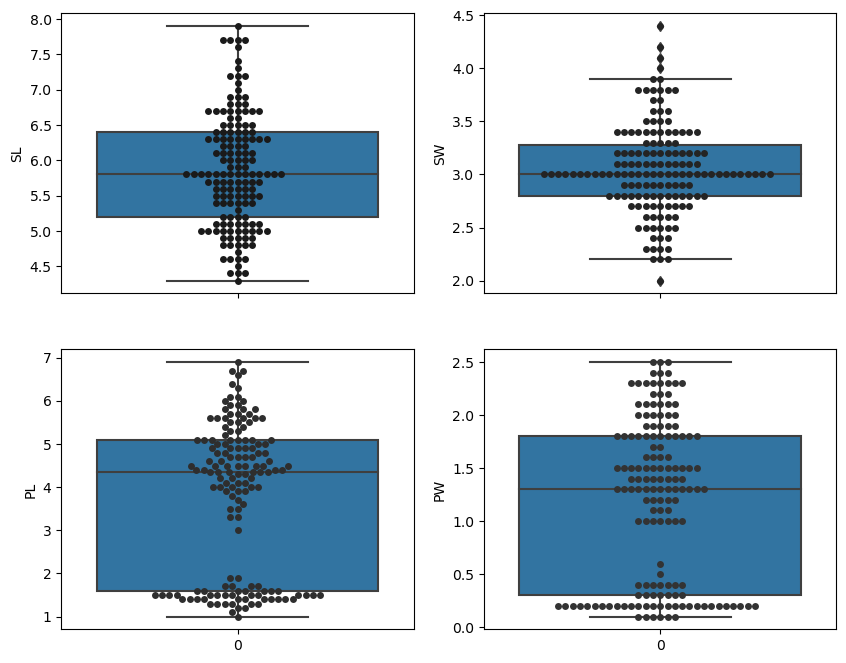

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,8))
sns.boxplot(ax=axes[0, 0], data=data['SL'])
sns.swarmplot(ax=axes[0, 0], data=data['SL'],color='.10')
sns.boxplot(ax=axes[0, 1], data=data['SW'])
sns.swarmplot(ax=axes[0, 1], data=data['SW'],color='.14')
sns.boxplot(ax=axes[1, 0], data=data['PL'])
sns.swarmplot(ax=axes[1, 0], data=data['PL'],color='.18')
sns.boxplot(ax=axes[1, 1], data=data['PW'])
sns.swarmplot(ax=axes[1, 1], data=data['PW'],color='.20')

In [20]:
A=np.percentile(data['SW'],25,interpolation='midpoint')
B=np.percentile(data['SW'],50,interpolation='midpoint')
C=np.percentile(data['SW'],75,interpolation='midpoint')

IQR=C-A
low_lim=A-1.5*IQR
upp_lim=C+1.5*IQR

data['SW']=np.where(data['SW']>upp_lim,upp_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_25052/161733624.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  A=np.percentile(data['SW'],25,interpolation='midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_25052/161733624.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  B=np.percentile(data['SW'],50,interpolation='midpoint')
/var/folders/j5/y57l9vp574g0szcfjxf1kxl40000gp/T/ipykernel_25052/161733624.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the 

<Axes: ylabel='SW'>

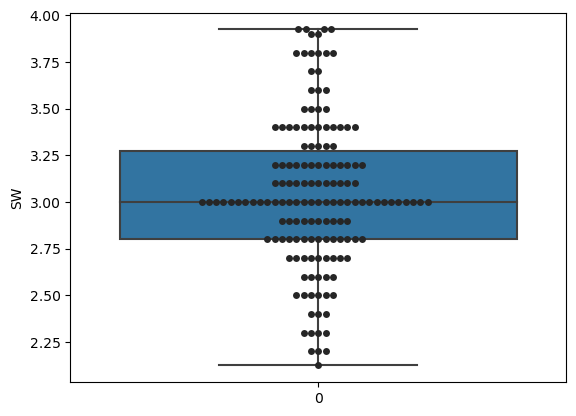

In [21]:
sns.boxplot( data=data['SW'])
sns.swarmplot(data=data['SW'],color='.15')

# 3. Find out which classification model gives the best result

In [24]:
x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## 1.Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

/Users/geena.tharian/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_prd_lr = logit_model.predict(x_test)
y_prd_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_prd_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_prd_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_prd_lr,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_prd_lr))

Accuracy =  0.9736842105263158
Precision =  0.4292929292929293
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


## 2.KNN 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

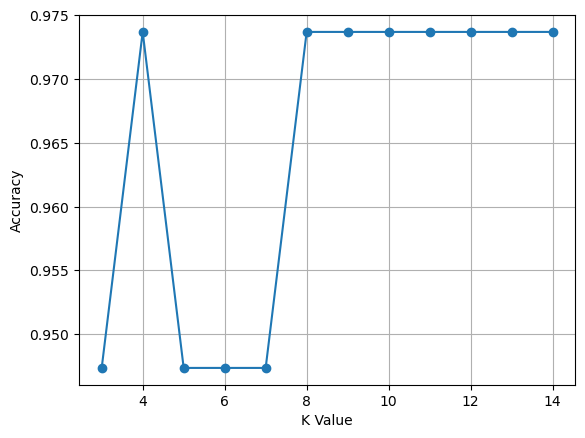

In [36]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [37]:
Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [38]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


## 3. SVM Model 

In [39]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [40]:
y_pred_svm=svmclf.predict(x_test)

In [41]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [42]:
# creating a dataframe for a array-formatted confusion matrix
cm_df = pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                     columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [43]:
cm_df

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,15,0,0
Iris-versicolor,0,11,0
Iris-virginica,0,0,12


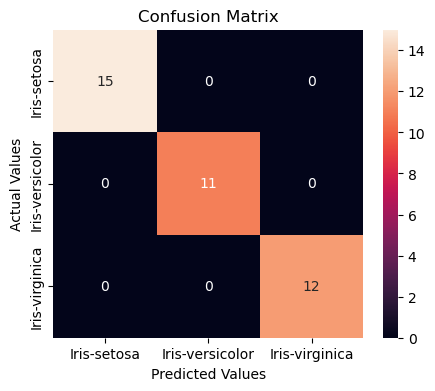

In [44]:
#plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## 4. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred_dt = dt_clf.predict(x_test)

In [47]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## 5. Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)



In [50]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### Conclusion 

 Among 5 above classification models- SVM,Decision tree and Random forest models are best since they give accuracy rate 1.
